# Direct LiNGAM Conjecture

When I try to visualize the results of experiments on Direct LiNGAM non-linear, I found out that what actually happened may not what we expected.

In experiments, we simply used non-linear function to generate data and did the tests. But actually, the algorithm works very different on different kinds of functions. There are three basic types of functions:
1. Do not have a reverse function: In this case, it is impossible to get what we expected, because one y could have multiple x corresponding.
2. The function has infinite derivative in some ranges: In this case the non-linear method can not fit the data properly. This will automatically result in weird residual. In most cases, the residual becomes highly dependent on variables.
3. Monotonous function with normal derivative: Similar with Linear Model. In this case the Direct LiNGAM Conjecture can actually work as we expected.

## Nonmonotonic Function

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from because.synth import gen_data
import math
from sklearn import svm
from because.probability.rcot.RCoT import RCoT
from because.probability.rff.rffridge import RFFRidgeRegression
from sklearn.ensemble import RandomForestRegressor

In [2]:
test = 'C:/Users/91952/Because/because/probability/test/models/directTestDat.py'
dataPoints = 10000
gen = gen_data.Gen(test)
dat = gen.getDataset(dataPoints)

In [3]:
N = dat['M']
N2 = dat['M3']

In [4]:
N = np.array(N).reshape(-1, 1)
N2 = np.array(N2)

x = np.linspace(-10, 10, 100)
y = x ** 2

reg = RFFRidgeRegression(rff_dim=100)
reg.fit(N, N2)
y_p = reg.predict(x.reshape(-1, 1))

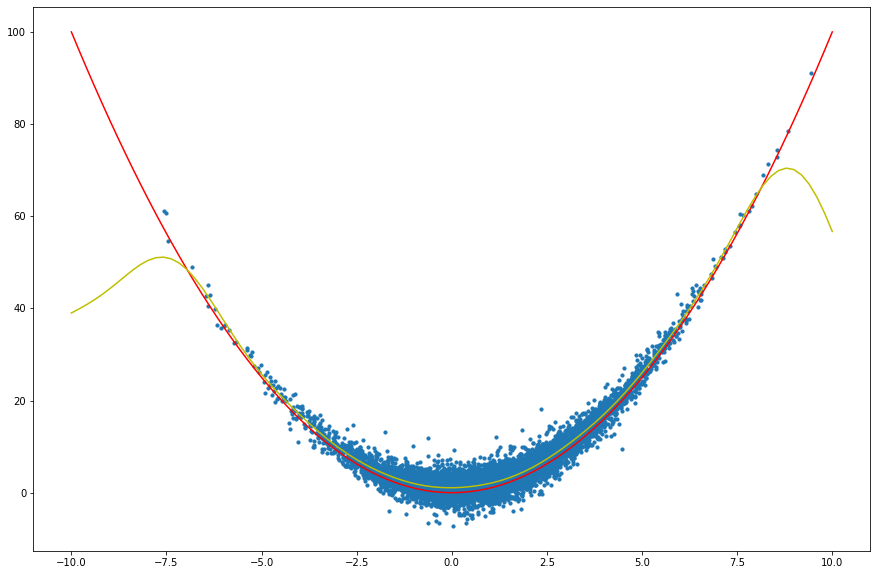

In [5]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(N, N2, s=10)

ax.plot(x, y, 'r-')

ax.plot(x, y_p, 'y-')

plt.show()

In [6]:
residual = N2 - reg.predict(N)
(p, Sta) = RCoT(N.reshape(-1), residual)
print(p[0])

0.40496250876521456


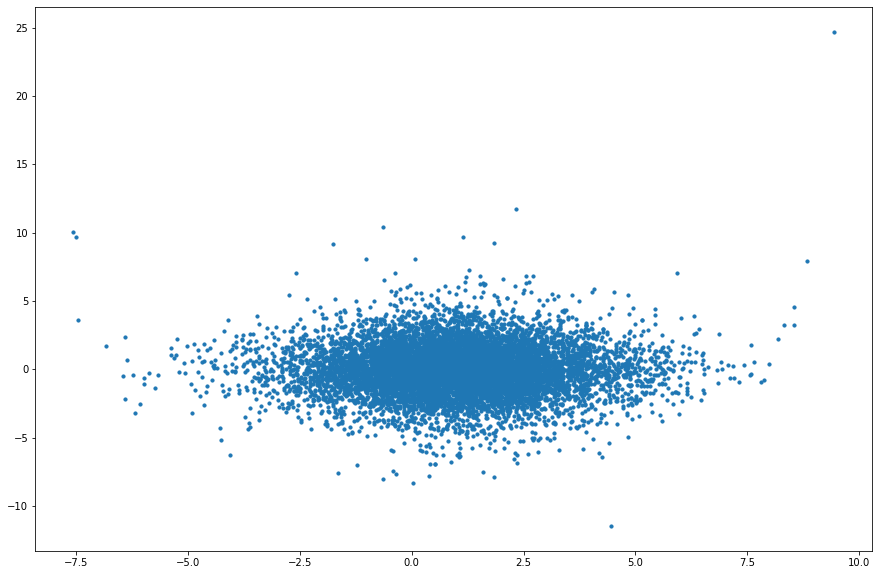

In [7]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(N, residual, s=10)

plt.show()

In [8]:
N = dat['M']
N2 = dat['M3']
N2 = np.array(N2).reshape(-1, 1)
N = np.array(N)

y = np.linspace(-10, 10, 100)
x = y ** 2

reg = RFFRidgeRegression(rff_dim=100)
reg.fit(N2, N)
y_p = reg.predict(x.reshape(-1, 1))

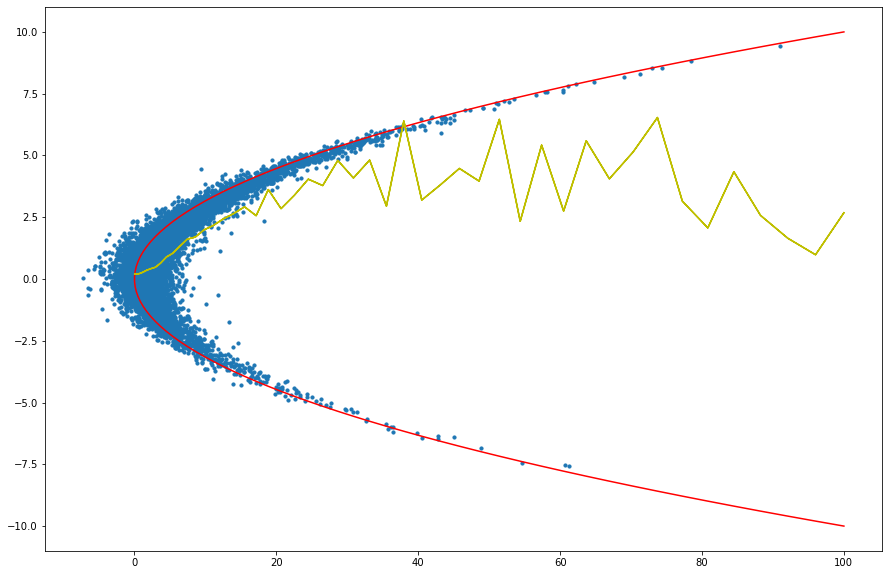

In [9]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(N2, N, s=10)

ax.plot(x, y, 'r-')

ax.plot(x, y_p, 'y-')

plt.show()

In [10]:
residual = N - reg.predict(N2)
(p, Sta) = RCoT(N2.reshape(-1), residual)
print(p[0])

7.771561172376096e-16


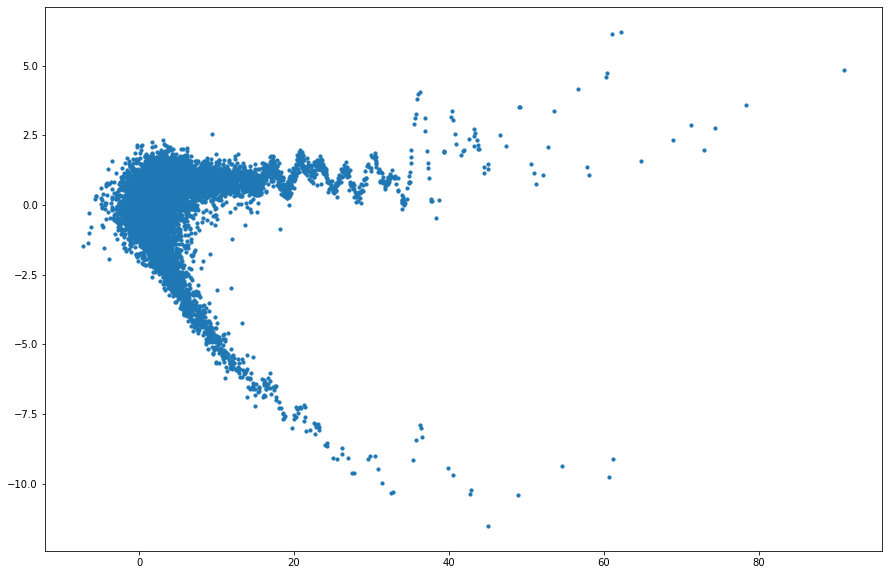

In [11]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(N2, residual, s=10)

plt.show()

## Function with 0 derivative

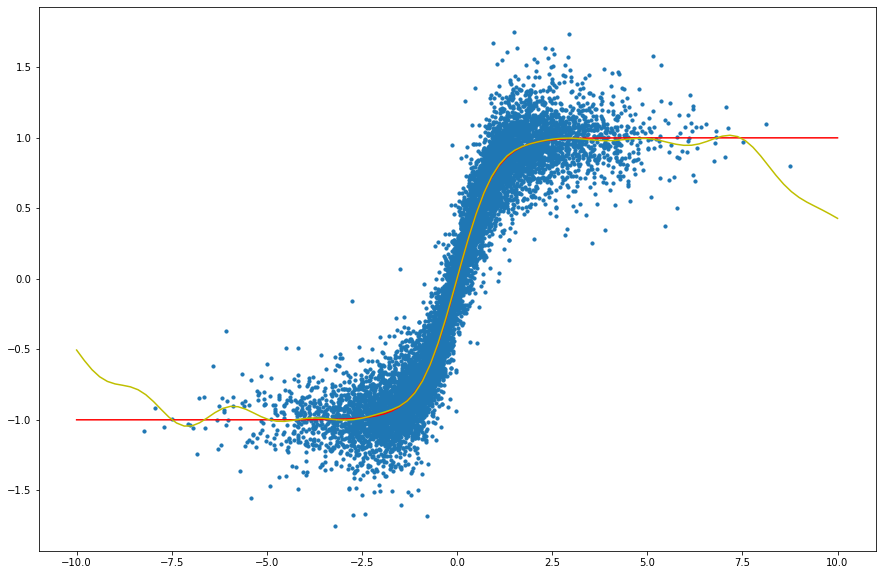

In [44]:
test = 'C:/Users/91952/Because/because/probability/test/models/directTestDat.py'
dataPoints = 10000
gen = gen_data.Gen(test)
dat = gen.getDataset(dataPoints)
N = dat['N']
N2 = dat['N2']
N = np.array(N).reshape(-1, 1)
N2 = np.array(N2)

x = np.linspace(-10, 10, 100)
y = np.tanh(x)

reg = RFFRidgeRegression(rff_dim=100)
#reg = RandomForestRegressor()
reg.fit(N, N2)
y_p = reg.predict(x.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(N, N2, s=10)

ax.plot(x, y, 'r-')

ax.plot(x, y_p, 'y-')

plt.show()

In [45]:
residual = N2 - reg.predict(N)
(p, Sta) = RCoT(N.reshape(-1), residual)
print(p[0])

0.27173703874087096


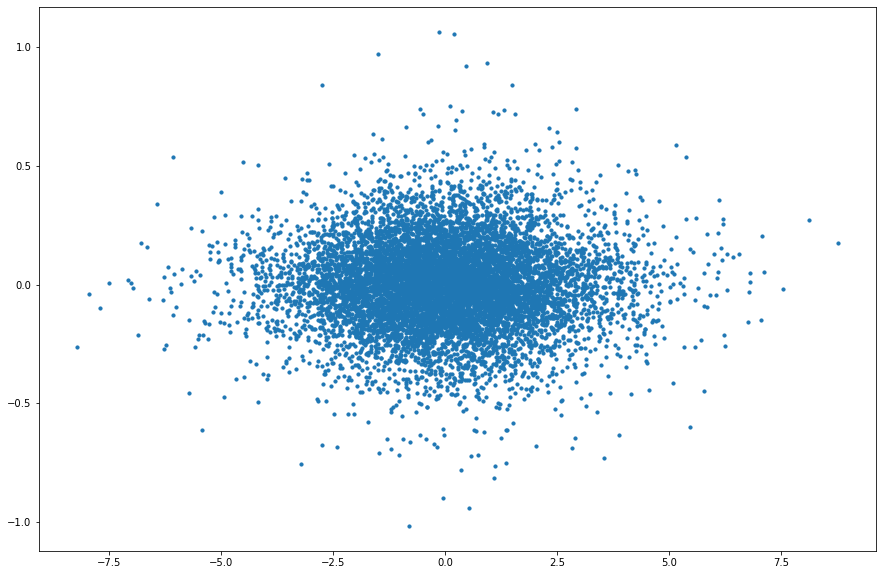

In [46]:
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(N, residual, s=10)

plt.show()

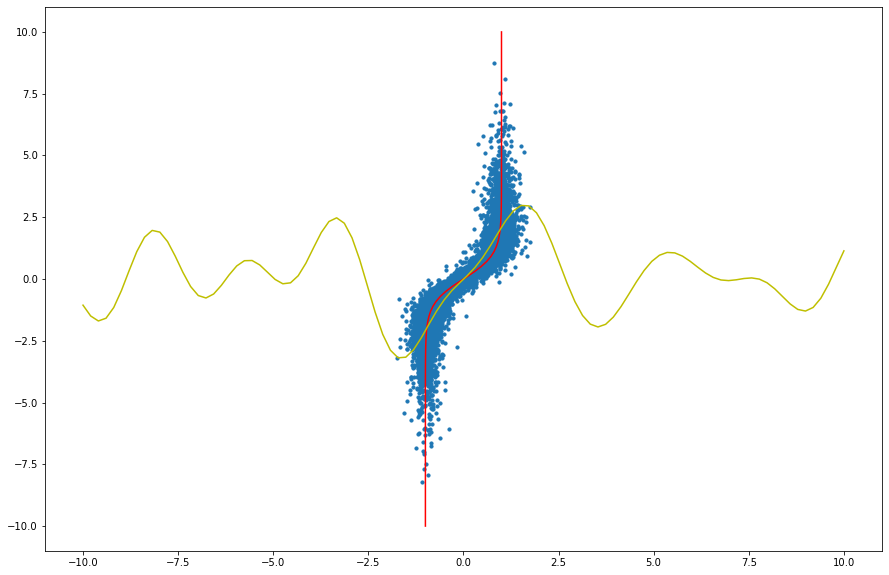

In [47]:
N = dat['N']
N2 = dat['N2']
N2 = np.array(N2).reshape(-1, 1)
N = np.array(N)

y = np.linspace(-10, 10, 100)
x = np.tanh(y)

reg = RFFRidgeRegression(rff_dim=100)
reg.fit(N2, N)
y_p = reg.predict(y.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(N2, N, s=10)

ax.plot(x, y, 'r-')

ax.plot(y, y_p, 'y-')

plt.show()

-8.881784197001252e-16


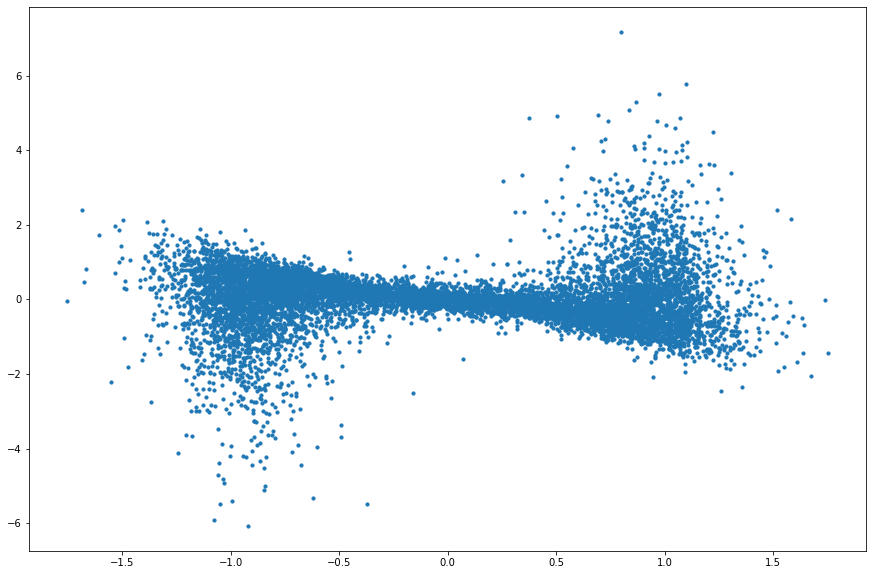

In [48]:
residual = N - reg.predict(N2)
(p, Sta) = RCoT(N2.reshape(-1), residual)
print(p[0])
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(N2, residual, s=10)

plt.show()

### Linear Likely Function

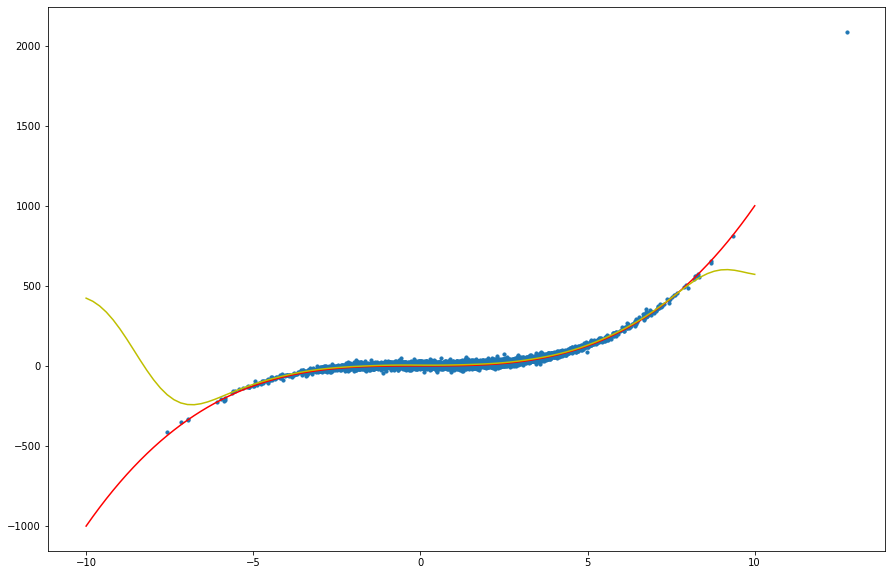

In [51]:
test = 'C:/Users/91952/Because/because/probability/test/models/directTestDat.py'
dataPoints = 10000
gen = gen_data.Gen(test)
dat = gen.getDataset(dataPoints)
N = dat['M']
N2 = dat['M5']
N = np.array(N).reshape(-1, 1)
N2 = np.array(N2)

x = np.linspace(-10, 10, 100)
y = x ** 3

reg = RFFRidgeRegression(rff_dim=100)
reg.fit(N, N2)
y_p = reg.predict(x.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(N, N2, s=10)

ax.plot(x, y, 'r-')

ax.plot(x, y_p, 'y-')

plt.show()

0.22358916096833925


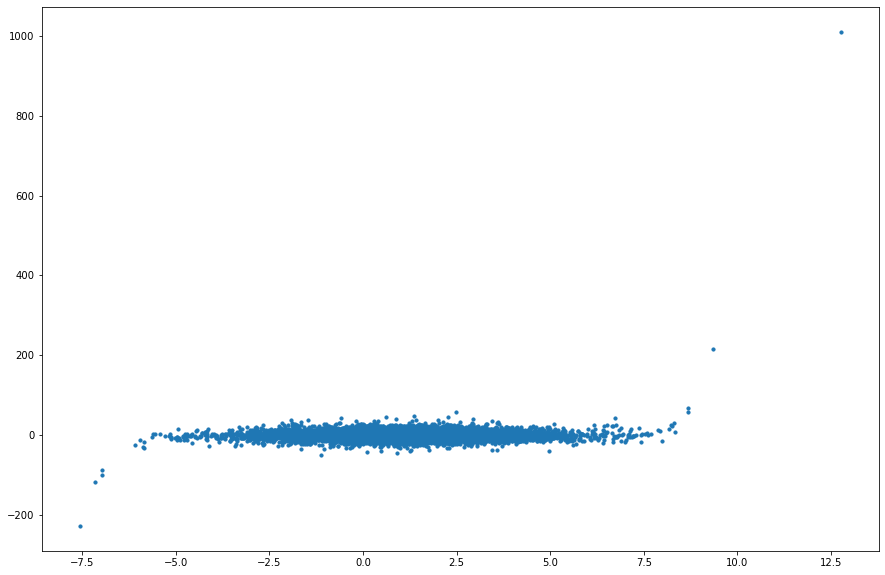

In [52]:
residual = N2 - reg.predict(N)
(p, Sta) = RCoT(N.reshape(-1), residual)
print(p[0])
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(N, residual, s=10)

plt.show()

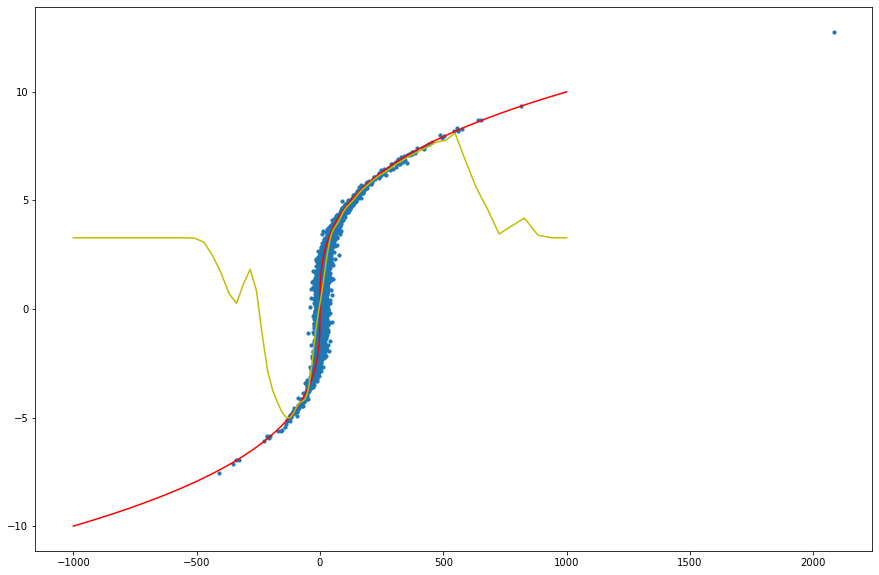

In [60]:
N = dat['M']
N2 = dat['M5']
N2 = np.array(N2).reshape(-1, 1)
N = np.array(N)

y = np.linspace(-10, 10, 100)
x = y ** 3

#reg = RFFRidgeRegression(rff_dim=1000)
reg = svm.SVR(kernel='rbf')
reg.fit(N2, N)
y_p = reg.predict(x.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(N2, N, s=10)

ax.plot(x, y, 'r-')

ax.plot(x, y_p, 'y-')

plt.show()

-2.220446049250313e-16


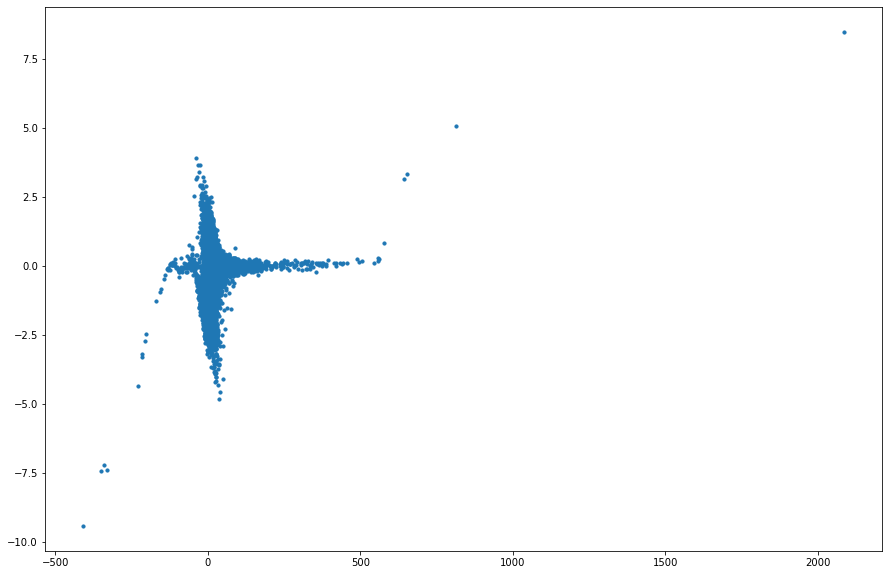

In [61]:
residual = N - reg.predict(N2)
(p, Sta) = RCoT(N2.reshape(-1), residual)
print(p[0])
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(N2, residual, s=10)

plt.show()

## Normal Noise

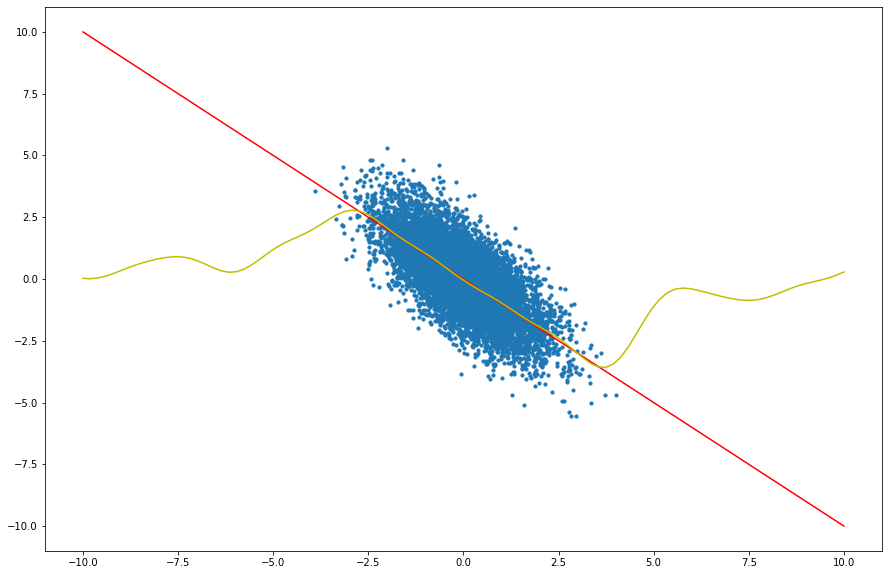

In [62]:
test = 'C:/Users/91952/Because/because/probability/test/models/directTestDat.py'
dataPoints = 10000
gen = gen_data.Gen(test)
dat = gen.getDataset(dataPoints)
N = dat['IVB']
N2 = dat['IVA']
N = np.array(N).reshape(-1, 1)
N2 = np.array(N2)

x = np.linspace(-10, 10, 100)
y = - x

reg = RFFRidgeRegression(rff_dim=100)
#reg = RandomForestRegressor()
reg.fit(N, N2)
y_p = reg.predict(x.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(N, N2, s=10)

ax.plot(x, y, 'r-')

ax.plot(x, y_p, 'y-')

plt.show()

0.8305513487659577


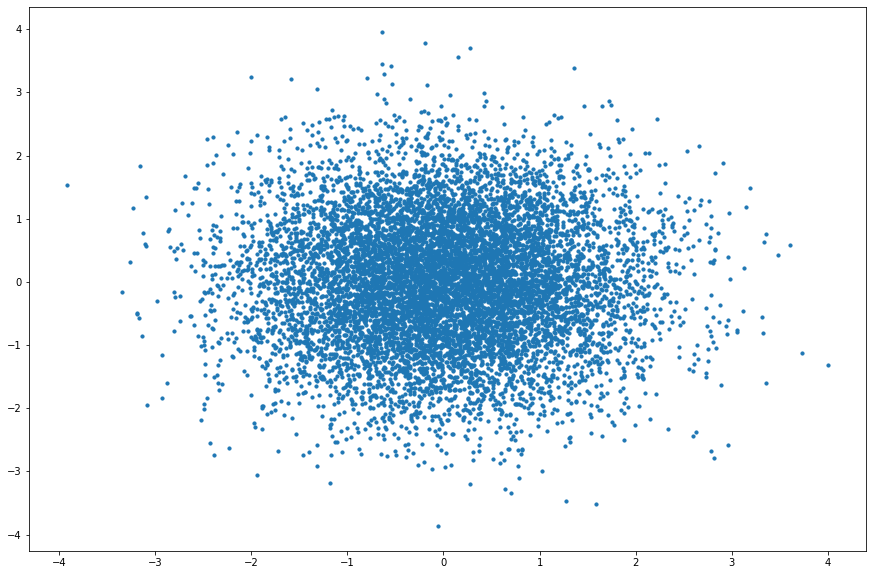

In [63]:
residual = N2 - reg.predict(N)
(p, Sta) = RCoT(N.reshape(-1), residual)
print(p[0])
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(N, residual, s=10)

plt.show()

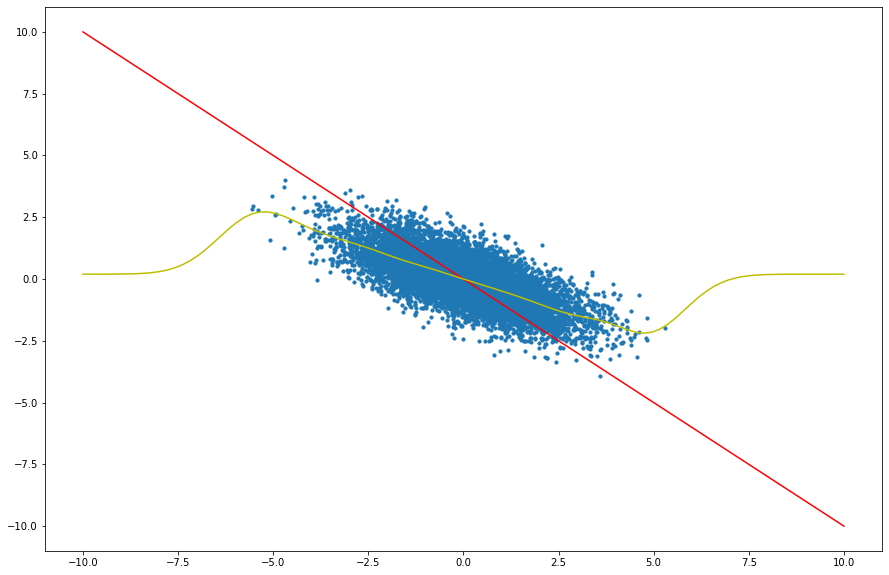

In [64]:
N = dat['IVB']
N2 = dat['IVA']
N2 = np.array(N2).reshape(-1, 1)
N = np.array(N)

y = np.linspace(-10, 10, 100)
x = - y

#reg = RFFRidgeRegression(rff_dim=1000)
reg = svm.SVR(kernel='rbf')
reg.fit(N2, N)
y_p = reg.predict(x.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(N2, N, s=10)

ax.plot(x, y, 'r-')

ax.plot(x, y_p, 'y-')

plt.show()

0.27899238214743016


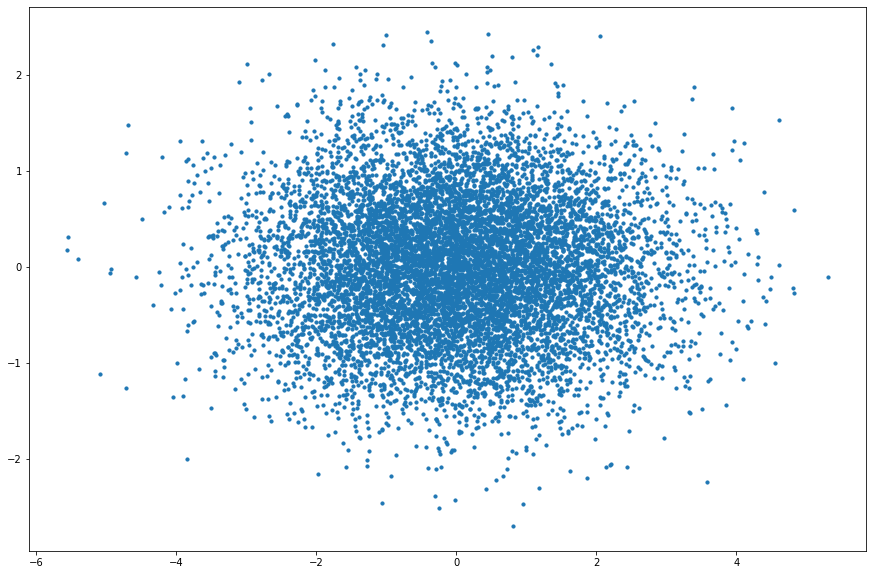

In [65]:
residual = N - reg.predict(N2)
(p, Sta) = RCoT(N2.reshape(-1), residual)
print(p[0])
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(N2, residual, s=10)

plt.show()

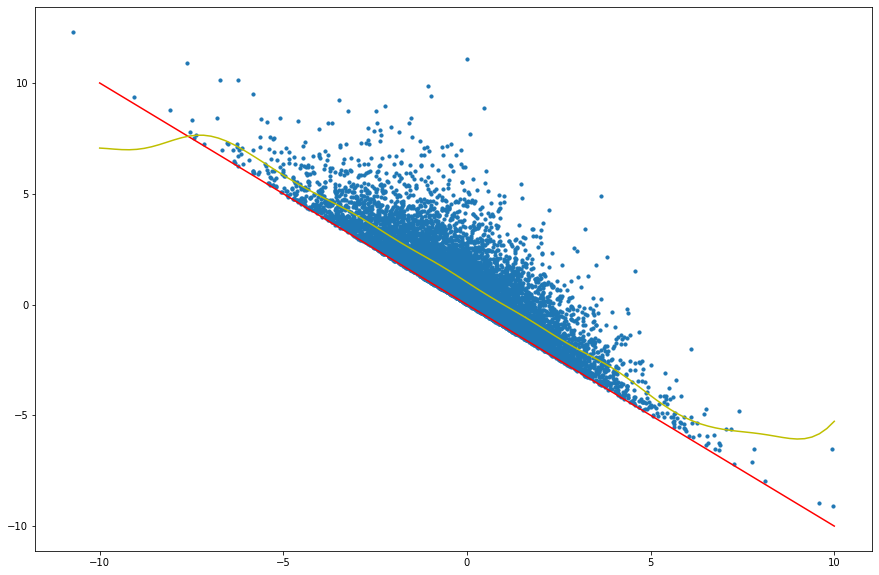

0.9658051269010687


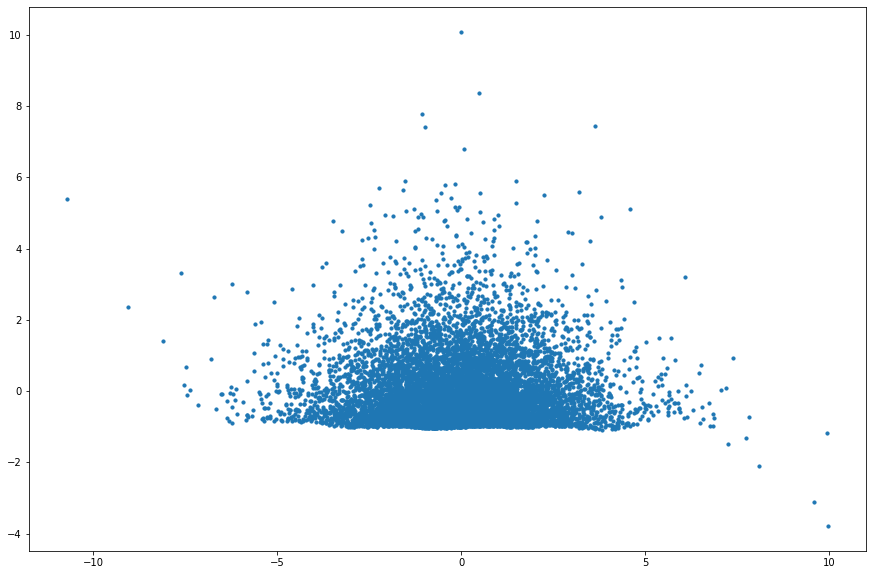

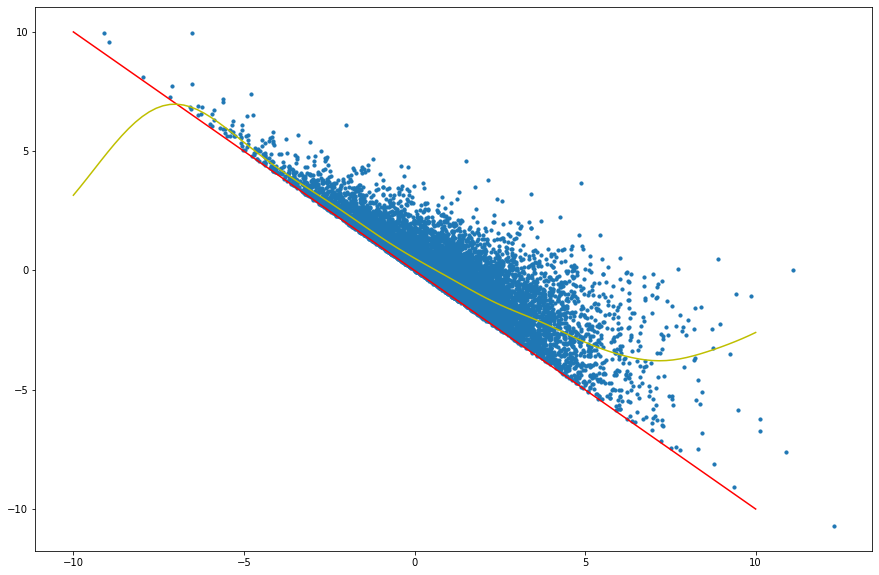

-1.5543122344752192e-15


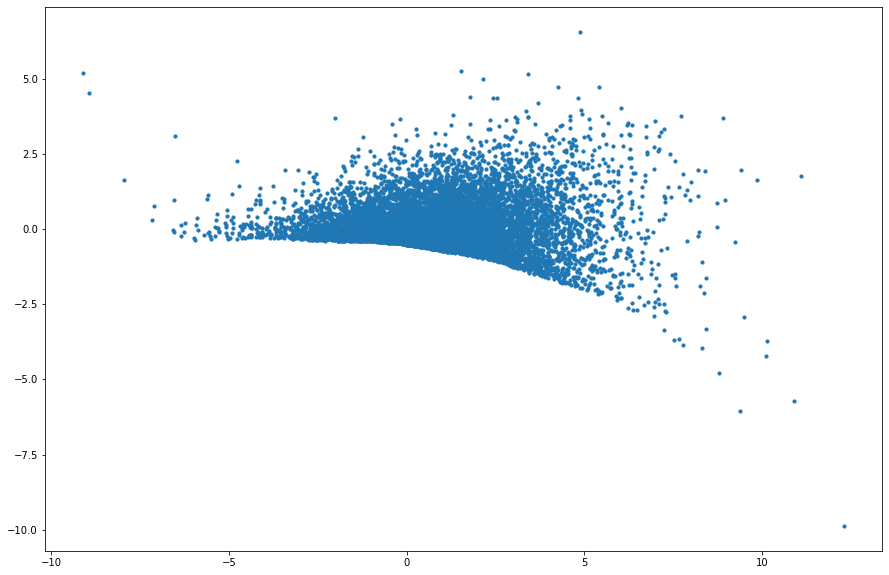

In [70]:
test = 'C:/Users/91952/Because/because/probability/test/models/directTestDat.py'
dataPoints = 10000
gen = gen_data.Gen(test)
dat = gen.getDataset(dataPoints)
N = dat['M']
N2 = dat['M2']
N = np.array(N).reshape(-1, 1)
N2 = np.array(N2)

x = np.linspace(-10, 10, 100)
y = - x

reg = RFFRidgeRegression(rff_dim=100)
#reg = RandomForestRegressor()
reg.fit(N, N2)
y_p = reg.predict(x.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(N, N2, s=10)

ax.plot(x, y, 'r-')

ax.plot(x, y_p, 'y-')

plt.show()
residual = N2 - reg.predict(N)
(p, Sta) = RCoT(N.reshape(-1), residual)
print(p[0])
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(N, residual, s=10)

plt.show()
N = dat['M']
N2 = dat['M2']
N2 = np.array(N2).reshape(-1, 1)
N = np.array(N)

y = np.linspace(-10, 10, 100)
x = - y

#reg = RFFRidgeRegression(rff_dim=1000)
reg = svm.SVR(kernel='rbf')
reg.fit(N2, N)
y_p = reg.predict(x.reshape(-1, 1))
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(N2, N, s=10)

ax.plot(x, y, 'r-')

ax.plot(x, y_p, 'y-')

plt.show()
residual = N - reg.predict(N2)
(p, Sta) = RCoT(N2.reshape(-1), residual)
print(p[0])
fig, ax = plt.subplots(figsize=(15, 10))

ax.scatter(N2, residual, s=10)

plt.show()